In [10]:
from siemens_pilots.utils.data import Subject
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
sub = Subject('alina')

df = sub.get_behavioral_data()

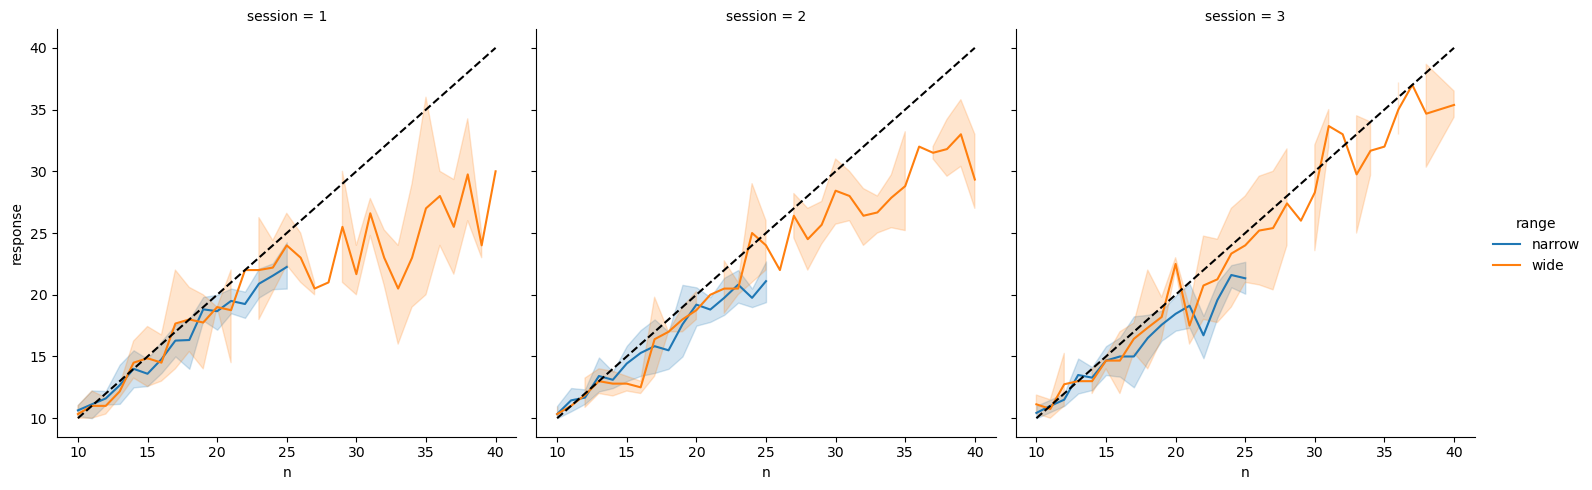

In [16]:
g = sns.relplot(x='n', y='response', hue='range', data=df.reset_index(), kind='line', col='session')
for ax in g.axes.flat:
    ax.plot([10, 40], [10, 40], 'k--')


Text(0.5, 0.98, 'Average bias (rolling mean, window=5)')

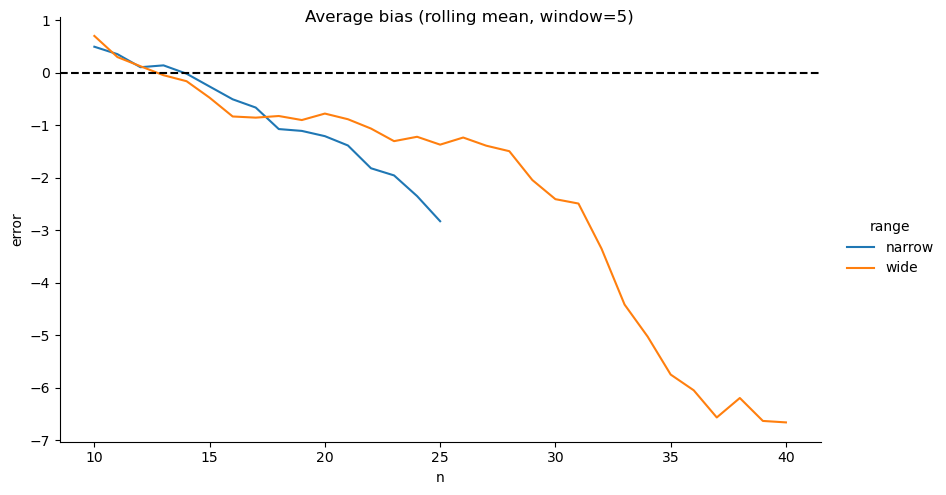

In [21]:
tmp = df.groupby(['subject', 'range', 'n'])['error'].mean().groupby(['subject', 'range']).apply(lambda d: d.rolling(5, min_periods=1).mean().droplevel([0,1]))

g = sns.relplot(x='n', y='error', hue='range', data=tmp.reset_index(), kind='line', aspect=1.7)

g.map(plt.axhline, y=0, ls='--', c='k')

g.fig.suptitle('Average bias (rolling mean, window=5)')

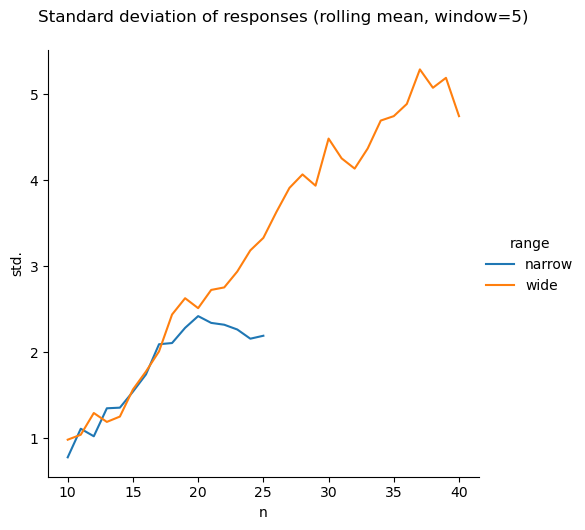

In [24]:
rolling_window = 5
# .apply(lambda d: d['bias'].rolling(rolling_window).mean()).to_frame().droplevel([2, 3])
df_std = df.groupby(['subject', 'range', 'n'], as_index=True)['response'].std().groupby(['subject', 'range']).apply(lambda d: d.rolling(rolling_window, min_periods=1).mean().droplevel([0, 1]))


g = sns.relplot(x='n', y='response', hue='range', data=df_std.reset_index(), kind='line', errorbar='se')

# g.set_titles('Standard deviation of responses')
g.fig.suptitle('Standard deviation of responses (rolling mean, window=5)', y=1.05)
g.set_ylabels('std.')